###  2D Discrete Fourier Transform  of an image function and its inverse 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image


In [2]:
from numpy.fft import fft2, fftshift, ifft2

In [4]:

import cv2

In [5]:
%matplotlib inline

In [6]:
im = Image.open("fantasy.jpg")
np.shape(im) # -- We can see that this is RGB image

(3032, 3032, 3)

In [7]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height

# alternative solution using PIL library
#new_img=im.resize((512,512))
#x=new_img.convert("L") # greyscale image
#y=np.asarray(x.getdata(),dtype=np.float64).reshape((x.size[1],x.size[0])) # convert to an array
#x.show()

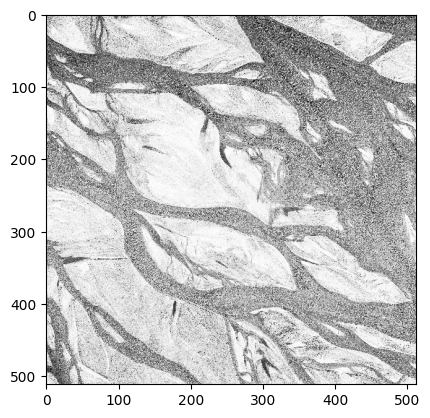

In [8]:
imshow(new_im, cmap='Greys')

In [9]:
# apply fft2 that refers to 2D fft. fft2() provides us the frequency transform which will be a complex array. It first argument is a greyscale image.
f=np.fft.fft2(new_im)
# next, we apply ffshift() that essentially performs multiplication operation f(x,y)(-1)^(x+y) and then takes the FT of this product.
# we want to place the zero frequency component in the center. Otherwise, it will be at the top left corner. We shift the result in both directions.
fshift=np.fft.fftshift(f)

In [10]:
# we have found DFT
fshift

array([[-18742.            +0.j        ,   1485.69882059 +5247.08524598j,
         -1848.44429436 -8129.74751493j, ...,
         22820.37195672 +5999.0862469j ,  -1848.44429436 +8129.74751493j,
          1485.69882059 -5247.08524598j],
       [ -1434.54267677  +903.58136969j,  14181.94711152 -5460.4533956j ,
         17936.86884832 -1712.27818336j, ...,
        -14318.75274821-11106.93076136j, -22846.19747492 -7102.24001691j,
          -674.36638017-11116.67630387j],
       [  7504.83927725+24279.51697279j, -31323.31323489 +8555.53731357j,
          3373.29412156-13546.95795072j, ...,
         15685.67103862+13515.59640525j, -12165.8611193 +23681.71495002j,
         -3131.40999296 +6064.53936187j],
       ...,
       [ 22380.74496122 +2321.29468753j,  21230.42868481 -8519.57559377j,
         22197.07528475 +1545.66846336j, ...,
        -10797.73475038-18053.71137548j,   4256.97609787 +1357.97843127j,
         -9393.64331882 -6686.66668427j],
       [  7504.83927725-24279.51697279j,  -3

In [11]:
# calculate the magnitude of DFT and log scale for the purpose of visualization
magnitude_spectrum=20*np.log(np.abs(fshift))

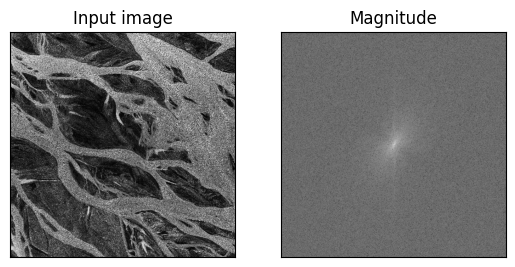

In [12]:
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

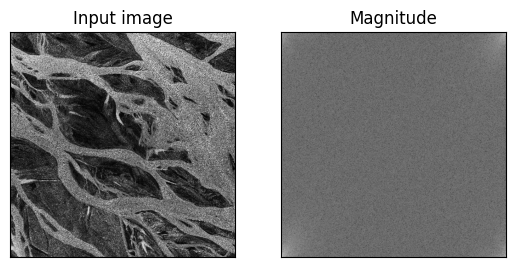

In [13]:
# We do not have a lot of low frequency content in this image.
# What happens if we undo shift operation?
f = np.fft.fft2(new_im)
fshift = np.fft.fftshift(f)
fshift=np.fft.ifftshift(fshift)
magnitude_spectrum=20*np.log(np.abs(fshift))
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Image after HPF'), ([], []), ([], []))

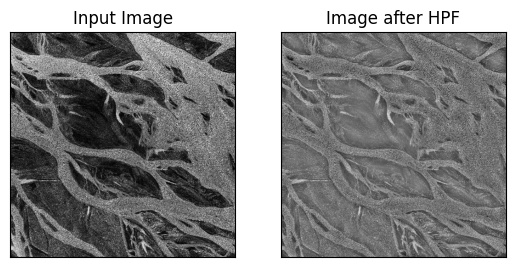

In [14]:
# We can hardly see the DC component.
# Having found the FT of an image, we can do some operations in frequency domain, 
# like highpass filtering or low pass filtering. WE can then reconstruct the image using inverse FFT.
f = np.fft.fft2(new_im)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = new_im.shape
row_c,col_c = int(rows/2) , int(cols/2)

# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)

fshift[row_c-10:row_c+10, col_c-10:col_c+10] = 0

# We want to remove the low frequencies by masking with a rectangular window of size 20x20. Below is our solution: 
# 1. Apply the inverse shift using ifftshift() so that DC component again come at the top-left corner.
# 2. Find inverse FFT using ifft2() function. What would be the result of iFFT? 
# 3. Take its absolute value.

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT
img_back = img_back.real

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

In [ ]:
# We can see how High Pass filter can detect edges. However, we do lose information over the entire image. 
# And for this example we would rather not apply a High Pass filter. 

### Question 1: Rerun the above procedure without the application of the High Pass filter. Does the inverse FT reconstruct the image close to the original?

In [ ]:
# paste the above cell here and make modifications to your code. 

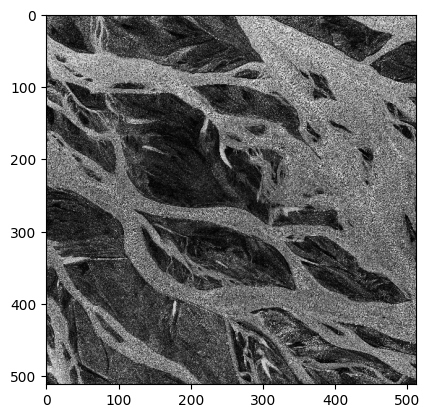

In [15]:
# Load the image and convert to greyscale
im = Image.open("fantasy.jpg")
new_im = cv2.imread("fantasy.jpg", 0)  # Greyscale image
new_im = cv2.resize(new_im, (512, 512))  # Resize image to 512x512

# Display the greyscale image
imshow(new_im, cmap='gray')

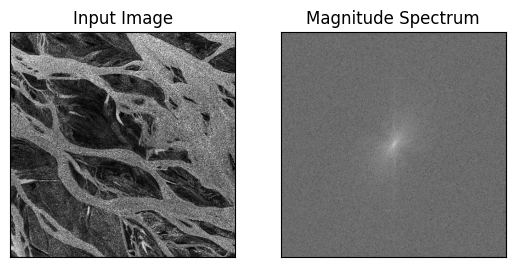

In [16]:
# Apply 2D FFT to the image
f = np.fft.fft2(new_im)

# Shift the zero frequency component to the center
fshift = np.fft.fftshift(f)

# Get the magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Plot the original image and its magnitude spectrum
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

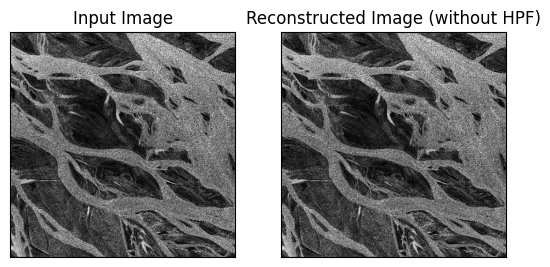

In [17]:
f_ishift = np.fft.ifftshift(fshift)

# Inverse FFT to reconstruct the image
img_back = ifft2(f_ishift)
img_back = img_back.real  # Take the real part of the result

# Plot the original image and the reconstructed image
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed Image (without HPF)'), plt.xticks([]), plt.yticks([])
plt.show()

### Question 2: Uncomment lines of code given below and continue to code in order to find the FT of "leaf.jpg" image and its Inverse.


In [18]:
im = Image.open("leaf.jpg")
np.shape(im) # -- We can see that this is RGB image
new_im=cv2.imread("leaf.jpg",0)
new_im=cv2.resize(new_im,(int(0.6*512),512)) # first is the width, second is height


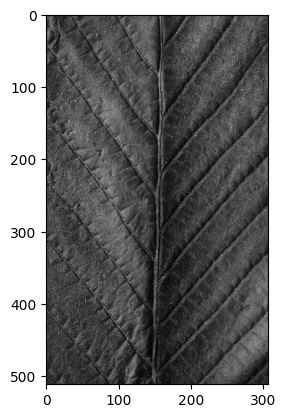

In [19]:
# Display the greyscale image
imshow(new_im, cmap='gray')


In [20]:
# Apply 2D FFT to the image
f = np.fft.fft2(new_im)

# Shift the zero frequency component to the center
fshift = np.fft.fftshift(f)

# Get the magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(fshift))

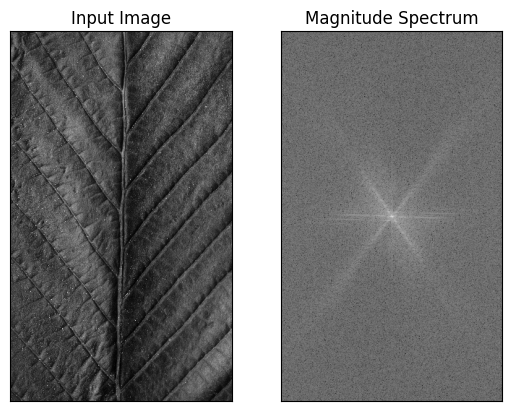

In [21]:
# Plot the original image and its magnitude spectrum
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


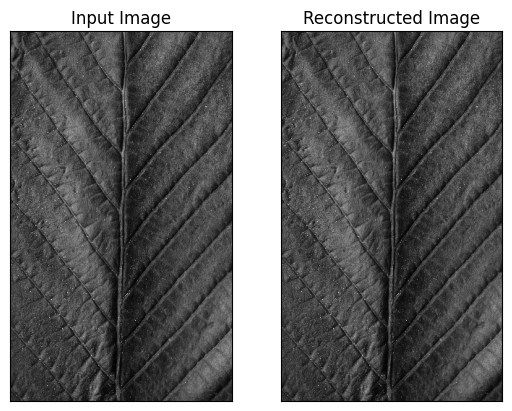

In [22]:
# Perform inverse FFT
# Shift back the zero frequency component to the top-left corner
f_ishift = np.fft.ifftshift(fshift)

# Inverse FFT to reconstruct the image
img_back = ifft2(f_ishift)
img_back = img_back.real  # Take the real part of the result

# Plot the original image and the reconstructed image
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Question 3: Display the magnitude of the FT of the leaf image. Does it show any prominent components along some directions? Do you think we can associate frequencies in the FT with patterns of intensity variation in an image? 

In [ ]:
# copy and paste a piece of code for visualization and state your observations on the relationship between the frequency components
# of the Fourier transform and image spatial characteristics. 

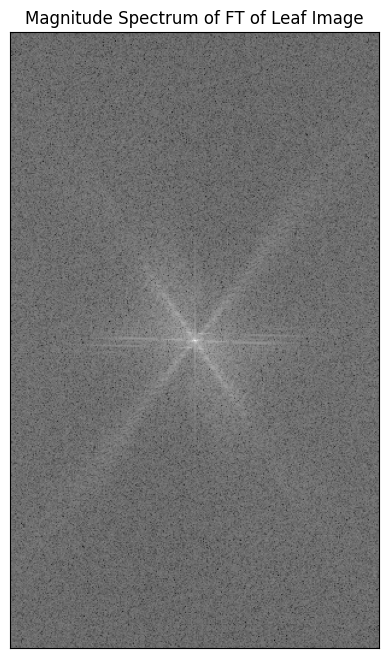

In [23]:
# Get the magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Plot the magnitude spectrum of the Fourier Transform
plt.figure(figsize=(8, 8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of FT of Leaf Image')
plt.xticks([]), plt.yticks([])
plt.show()


Observations:
The magnitude spectrum of the Fourier Transform shows prominent components along certain directions, often appearing as bright spots or lines radiating from the center.
These prominent components correspond to the dominant frequencies in the image. Frequencies near the center of the spectrum represent low-frequency components, capturing slow intensity variations (large, smooth regions in the image), while frequencies farther from the center represent high-frequency components, corresponding to rapid changes in intensity (edges, fine textures).
Patterns of intensity variation in the image are reflected in the frequency domain: horizontal, vertical, and diagonal lines in the image translate to strong frequency components along the corresponding axes in the magnitude spectrum.